# Numerical Experiments for "BayesCG as an uncertainty aware version of CG"

This notebook documents how the plots in the paper were produced. 

This notebook depends on the following files being in the same directory:
- plots.py
- utilities.py
- bayescg_k.py
- cgqs.py
- bsstk18_prec.mtx

Run all cells to replicate the plots in the paper. The commands that save the plots are commented out.


In [21]:
from Algorithms.kn_plots import * 
from Algorithms.utilities import *
from Algorithms.bayescg_k import bayescg_k
import numpy as np

from scipy.sparse.linalg import norm as spnorm
from scipy.io import mmread
from time import time


## Numerical Experiments

### Random Matrix

#### Setup

We generate the size $n = 100$ random matrix.

In [5]:
np.random.seed(1)

N = 100

A,SVD_A = random_matrix_generator(N,3,2)
U = SVD_A['U']
S = SVD_A['S']
SqrtInvA = U*(S**(-1/2))
CondA = max(S)/min(S)
NormA = max(S)

def AVec(w):
    return A@w

def InvAVec(w):
    return (U*(S**-1))@(U.conj().T@w)

def IVec(w):
    return w

x0 = np.zeros(N)


##### Right Hand Side (drawn from Inverse Prior)

In [6]:
xTrue = mv_normal(x0,SqrtInvA)
b = AVec(xTrue)

#### Identity Prior With Reorthogonalization

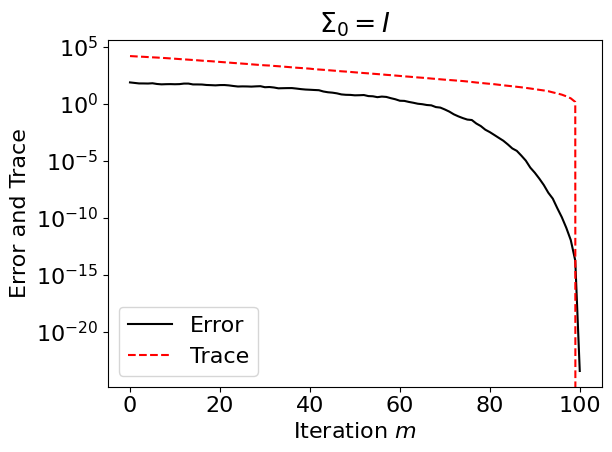

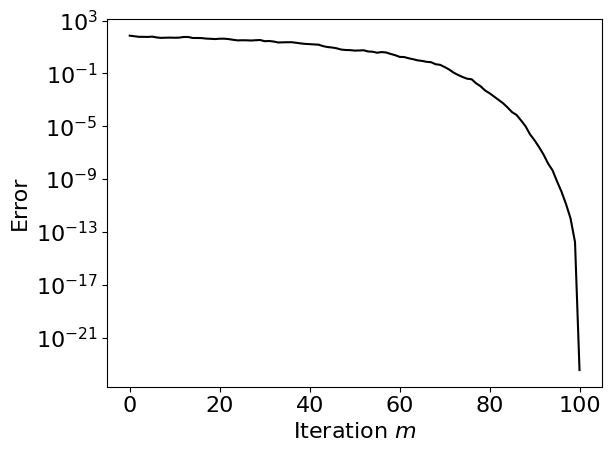

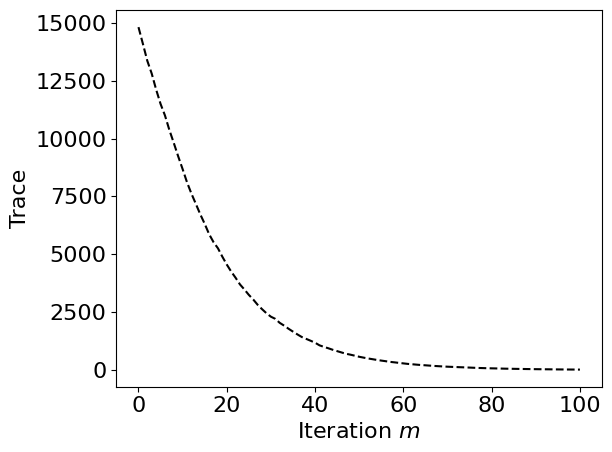

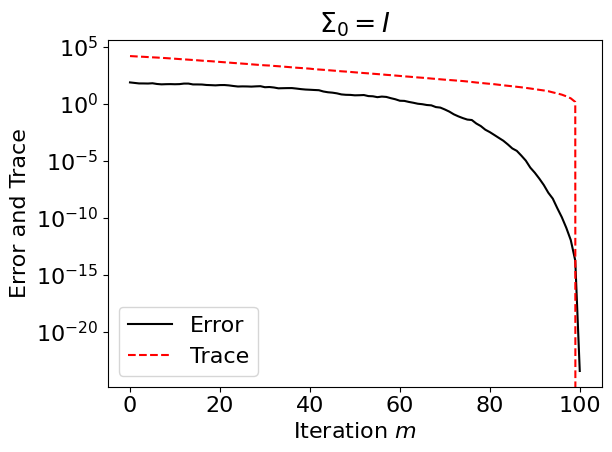

In [7]:
# RUN CELL TWICE TO SET FONT SIZE
plt.rcParams.update({'font.size': 16})

it = N
reorth = True
samples = None

bayescg_convergence(AVec, b, x0, IVec, NormA, xTrue, it, samples=samples, reorth=reorth, plt_title=False)

plt.figure(1)
AxesInvId = plt.axis()

plt.figure(1)
plt.title('$\Sigma_0 = I$')
plt.tight_layout()


plt.figure(1)
#plt.savefig('KN-Images/IdReorth.pdf')



#### Inverse Prior With Reorthogonalization

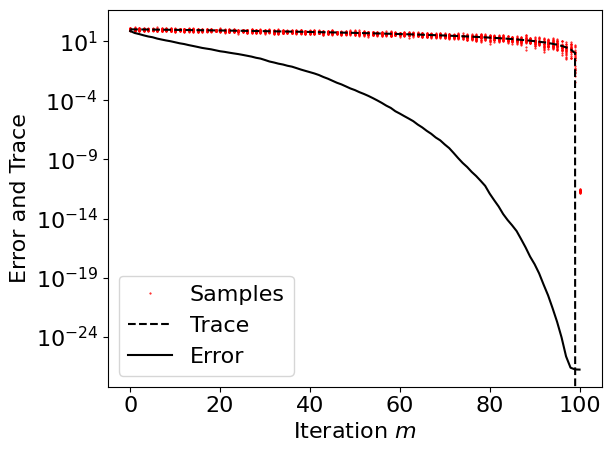

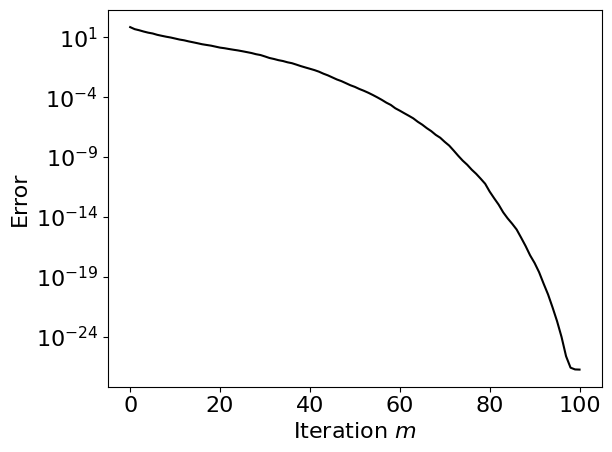

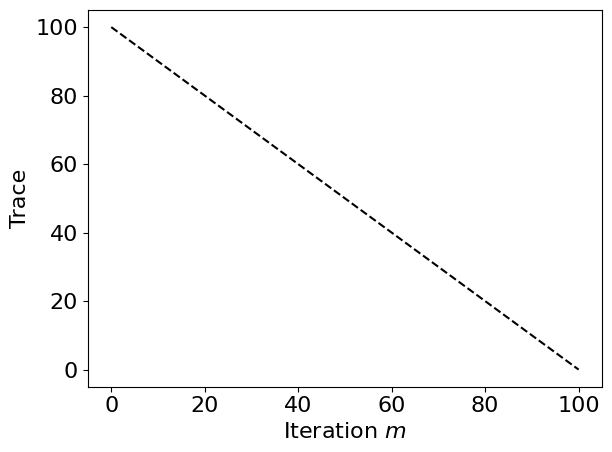

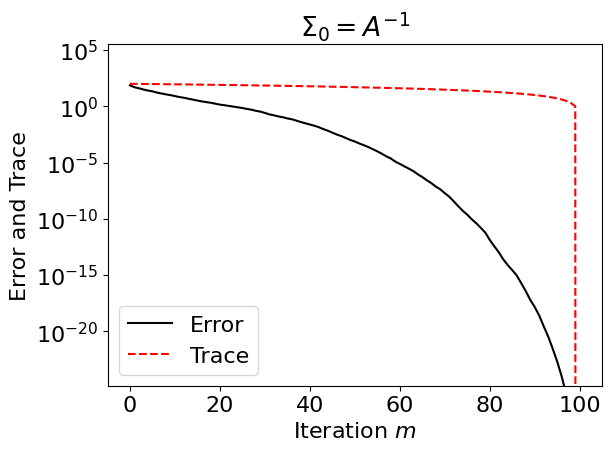

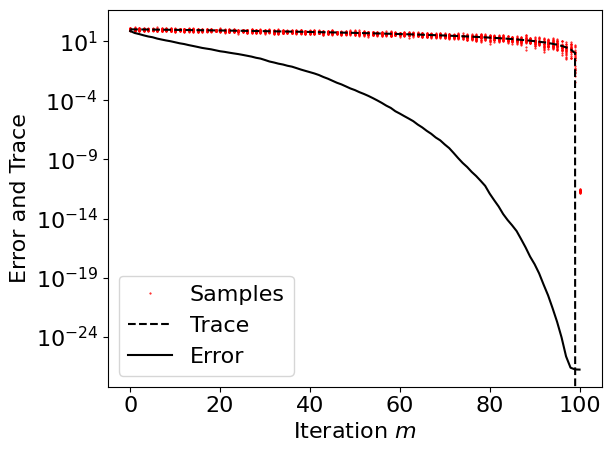

In [8]:
it = N
reorth = True
samples = 25

bayescg_convergence(AVec, b, x0, InvAVec, NormA, xTrue, it, 1, samples=samples, reorth=reorth, plt_title=False)

plt.figure(1)
plt.axis(AxesInvId)
plt.title('$\Sigma_0 = A^{-1}$')
plt.tight_layout()

plt.figure(4)
Axes = plt.axis()


plt.figure(1)
#plt.savefig('KN-Images/InvReorth.pdf')
plt.figure(4)
#plt.savefig('KN-Images/InvReorthSamples.pdf')




#### Krylov Prior With Reorthogonalization

Max Krylov dimension. No new search directions


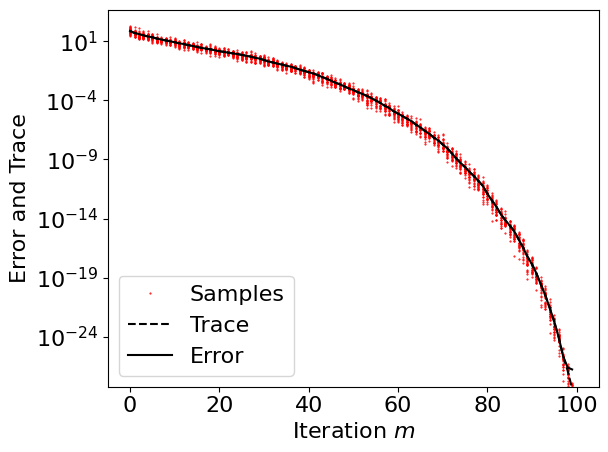

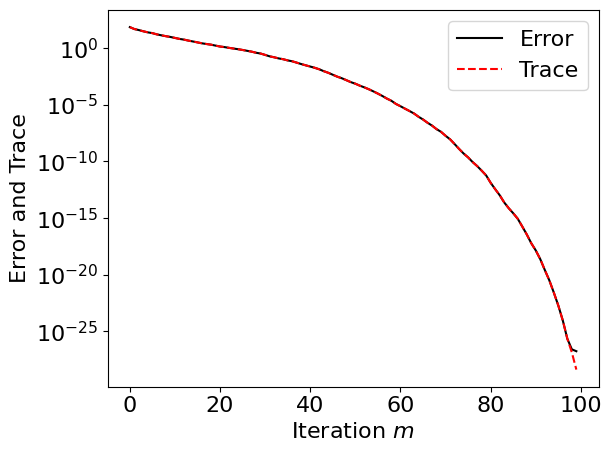

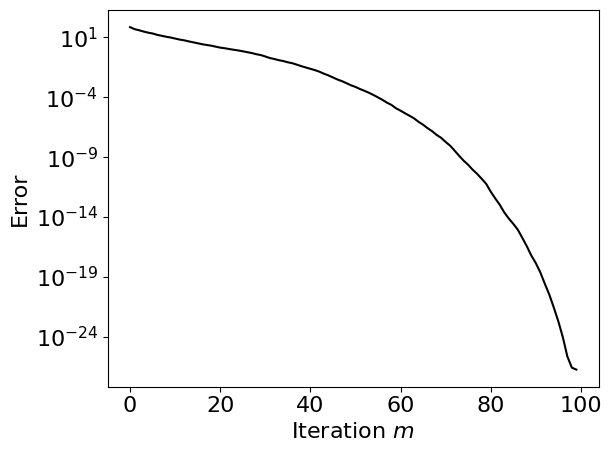

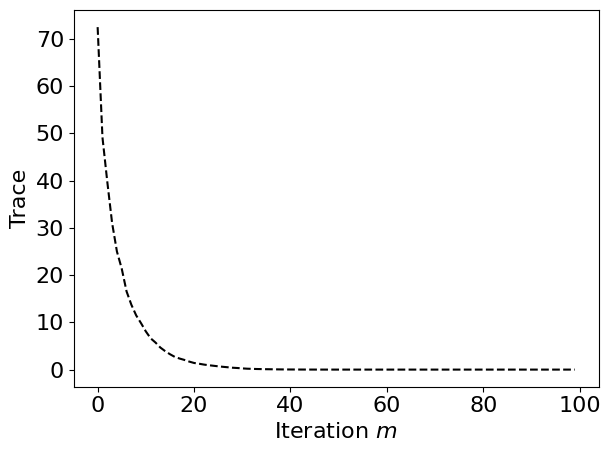

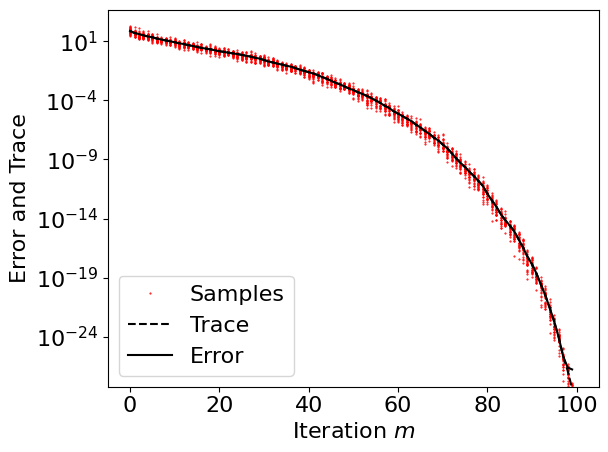

In [9]:
it = N-1
reorth = True
samples = 25

bayescg_convergence(AVec, b, x0, None, NormA, xTrue, it, N, samples=samples, reorth=reorth, plt_title=False)

plt.figure(4)
plt.axis(Axes)


plt.figure(4)
#plt.savefig('KN-Images/KrylovReorth.pdf')



#### Inverse Prior Without Reorthogonalization

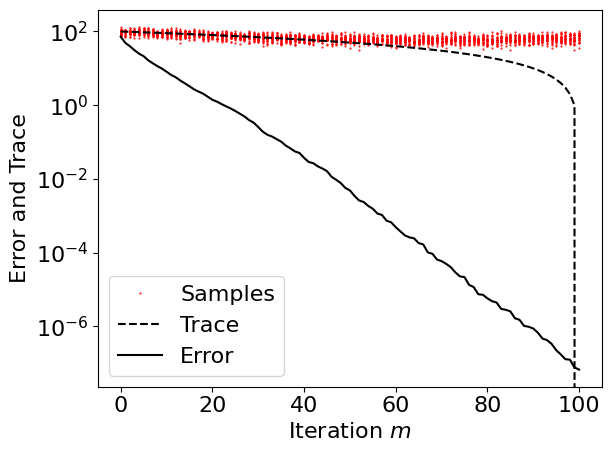

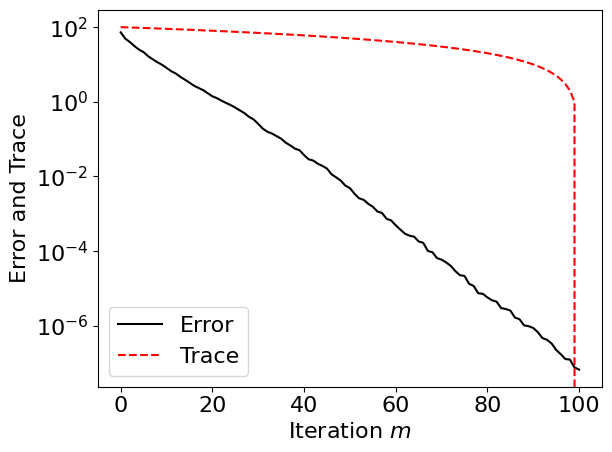

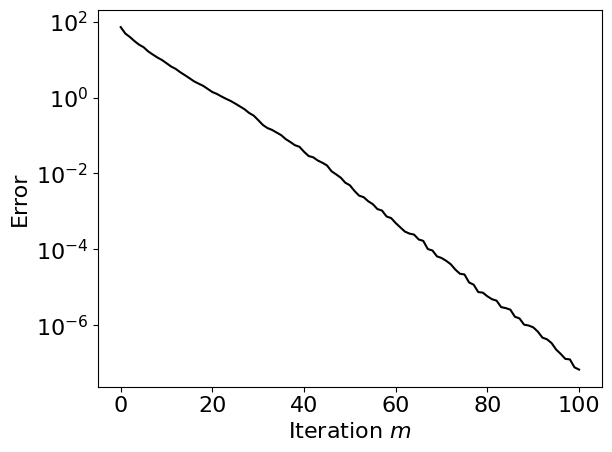

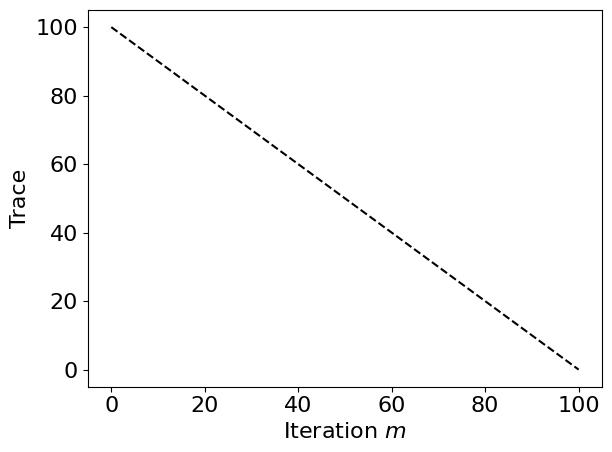

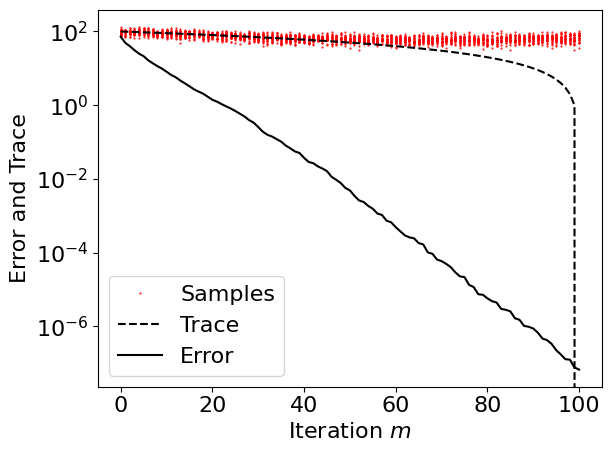

In [10]:
it = N
reorth = False
samples = 25

bayescg_convergence(AVec, b, x0, InvAVec, NormA, xTrue, it, 1, samples=samples, reorth=reorth, plt_title=False)

plt.figure(4)
Axes = plt.axis()


plt.figure(4)
#plt.savefig('KN-Images/InvNoReorthSamples.pdf')




#### Krylov Prior Without Reorthogonalization

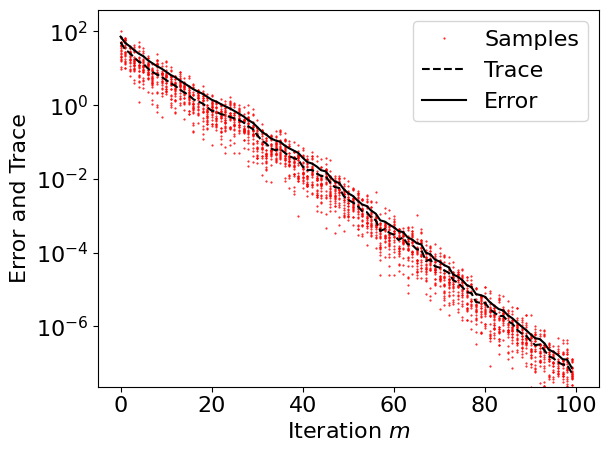

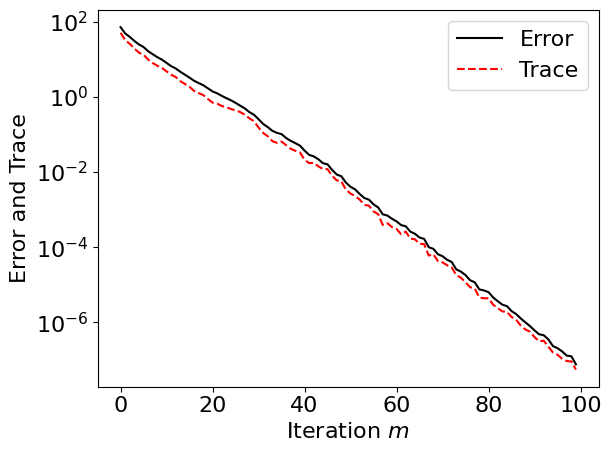

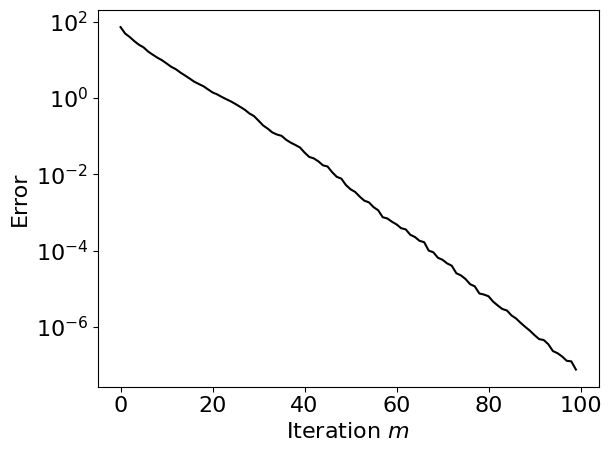

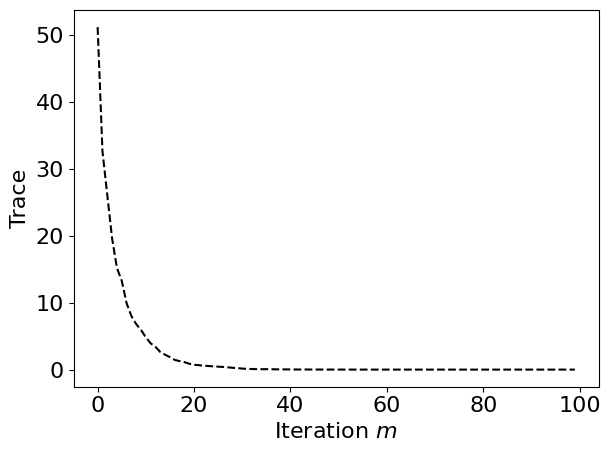

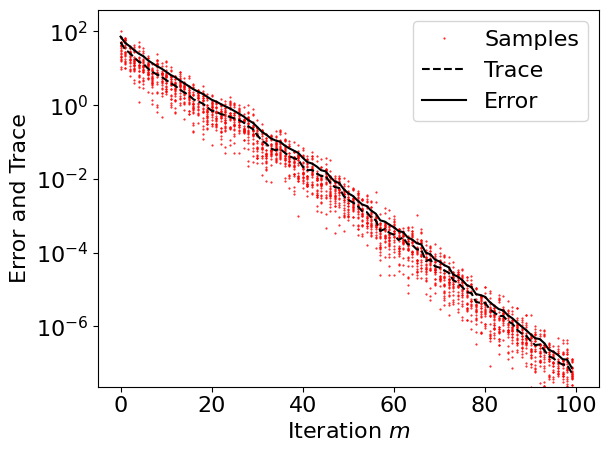

In [11]:
it = N-1
reorth = False
samples = 25

bayescg_convergence(AVec, b, x0, None, NormA, xTrue, it, 5, samples=samples, reorth=reorth, plt_title=False)

plt.figure(4)
plt.axis(Axes)


plt.figure(4)
#plt.savefig('KN-Images/KrylovNoReorth.pdf')



### Large Preconditioned Matrix

#### Setup

We setup the size $n = 11948$ linear system.

In [12]:
np.random.seed(1)

A = mmread('Matrices/bcsstk18_prec.mtx')

N = 11948


def AVec(w):
    return A.dot(w)

NormA = spnorm(A)
GR = None
#GR = 9e-14   # Min eig 9.04987e-14
CondA = NormA/9.04987e-14
print(CondA)

xTrue = np.ones(N)
b = AVec(xTrue)
x0 = np.zeros(N)

1567377.2101676133


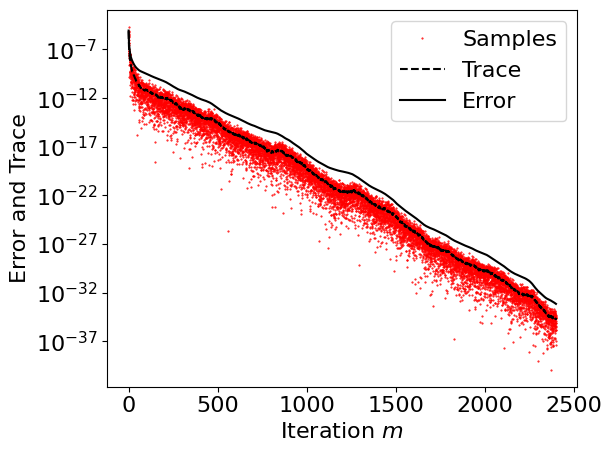

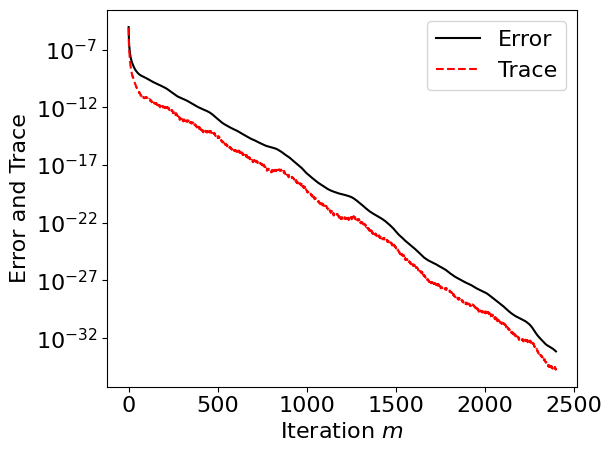

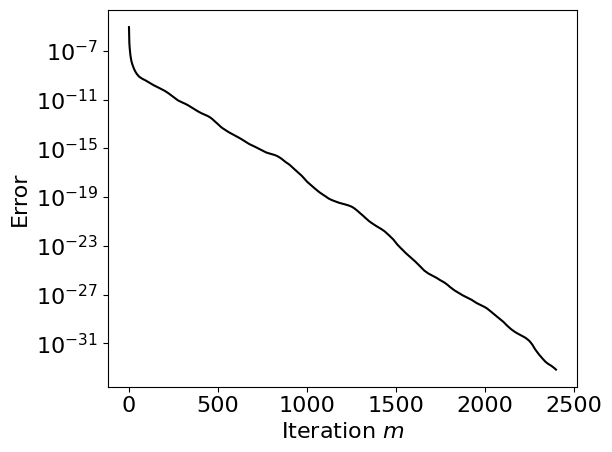

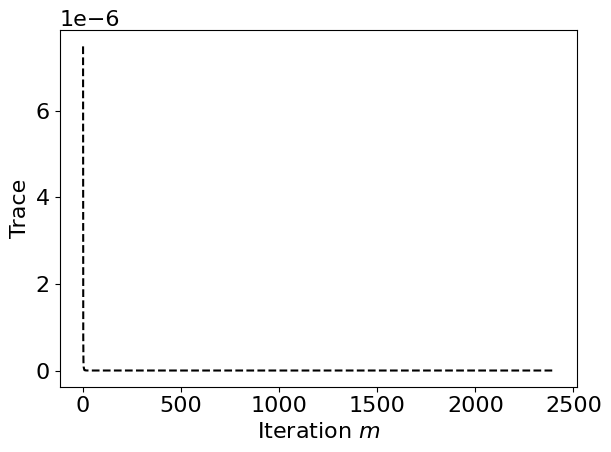

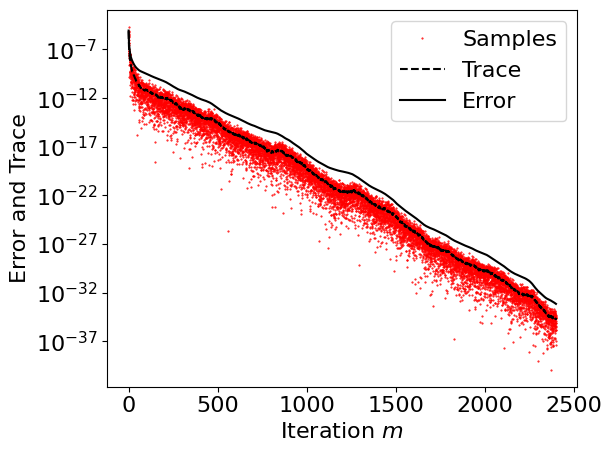

In [13]:
it = 2400
reorth = False
samples = 5
post_rank = 1

bayescg_convergence(AVec, b, x0, None, NormA, xTrue, it, post_rank, samples=samples, reorth=reorth, plt_title=False)

plt.figure(4)
Axes = plt.axis()


plt.figure(4)
#plt.savefig('KN-Images/KrylovBig1.pdf')



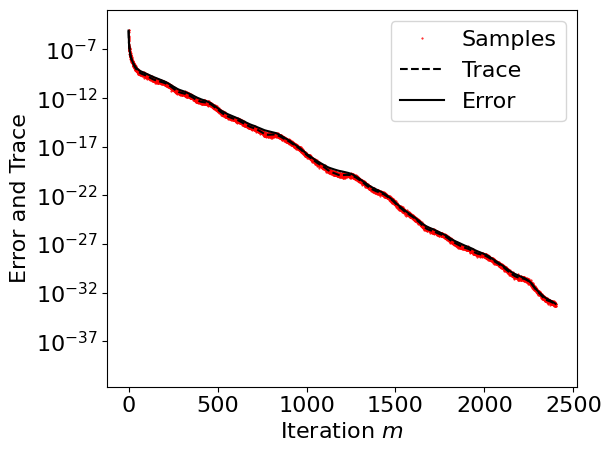

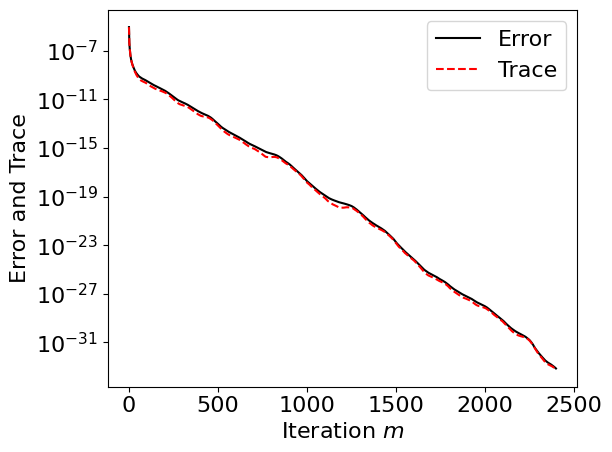

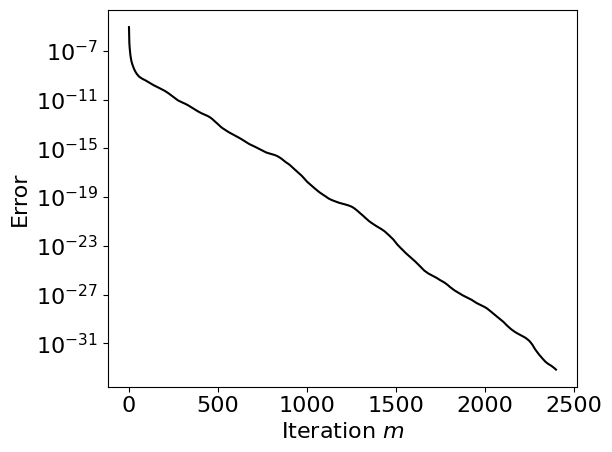

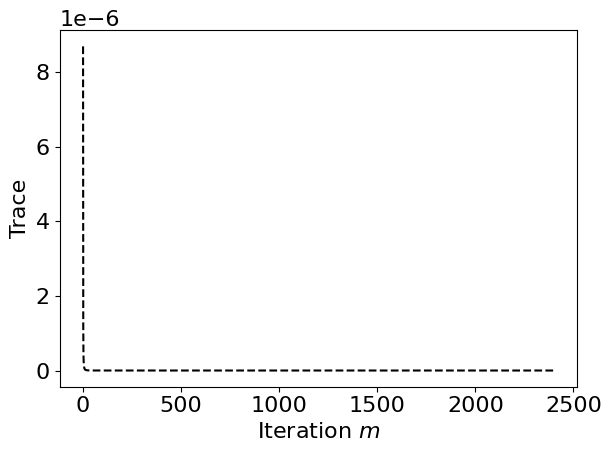

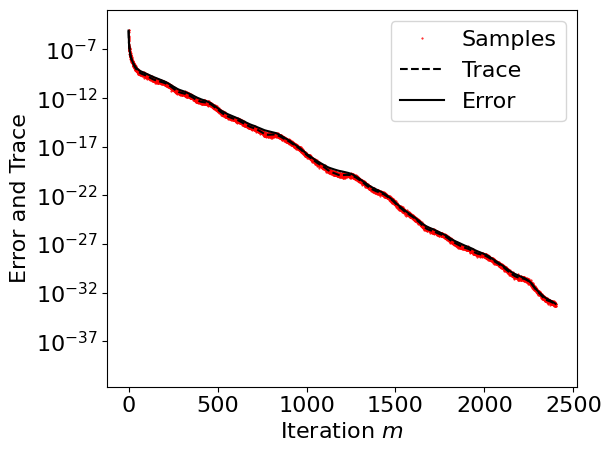

In [14]:
it = 2400
reorth = False
samples = 5
post_rank = 50

bayescg_convergence(AVec, b, x0, None, NormA, xTrue, it, post_rank, samples=samples, reorth=reorth, plt_title=False)

plt.figure(4)
plt.axis(Axes)


plt.figure(4)
#plt.savefig('KN-Images/KrylovBig50.pdf')



# Supplemental Experiments

## Krylov Prior and CG Error Estimation

We examine the use of the Krylov posterior as an error estimator for CG

### First experiment

The matrix we use to investigate error estimates is a random $n = 48$ symmetric positive definite matrix with the eigenvalue distribution $$\lambda_i = 10^4 + \frac{i-1}{48-1}(1000-0.1)(0.9)^{48-i}.$$ This eigenvalue distribution is originally from (Strakos, 1991). The solution vector is the vector of all ones and the initial guess is the vector of all zeros, that is $$\mathbf{x}_*=1 \qquad \text{and} \qquad \mathbf{x}_0 = 0.$$

#### Setup the problem

In [15]:
np.random.seed(1)

N = 48

A,SVD_A = random_matrix_generator(N,5,1)
CondA = max(SVD_A['S'])/min(SVD_A['S'])
NormA = max(SVD_A['S'])

def AVec(w):
    return A@w


xTrue = np.ones(N)
b = AVec(xTrue)
x0 = np.zeros(N)

#### Run the experiment

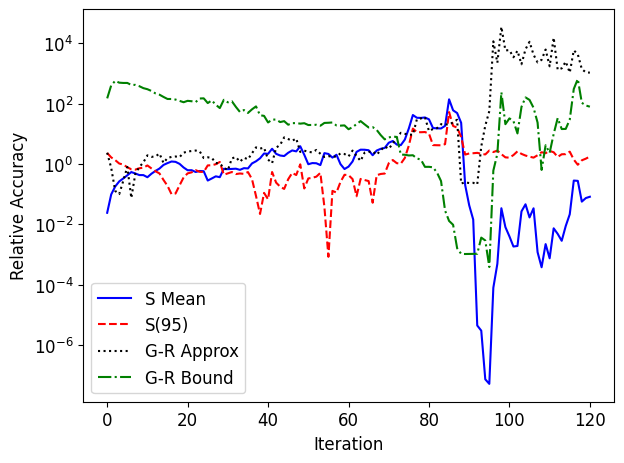

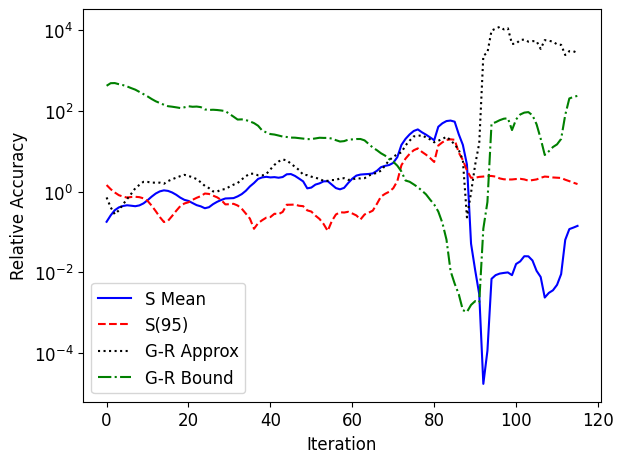

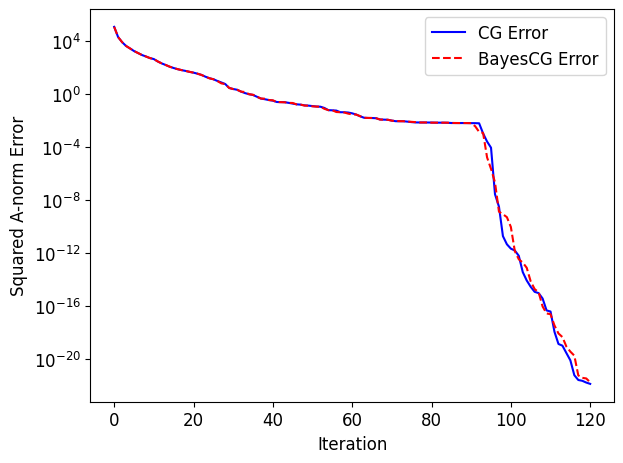

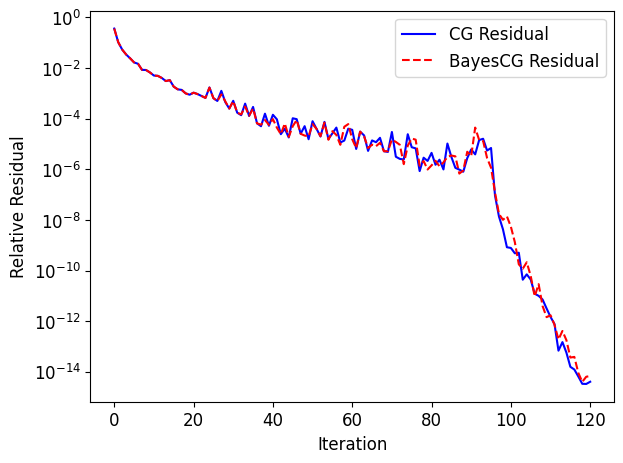

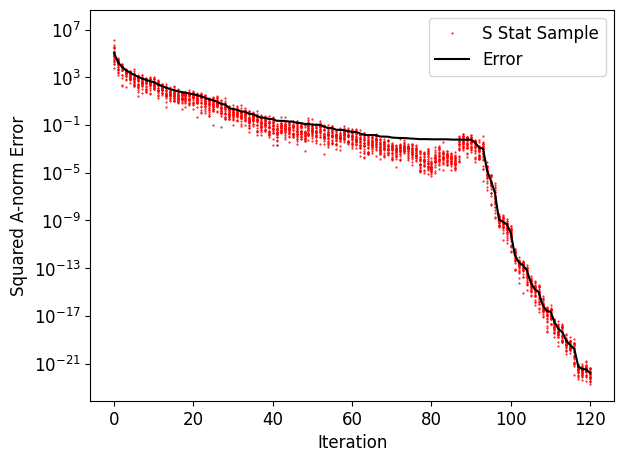

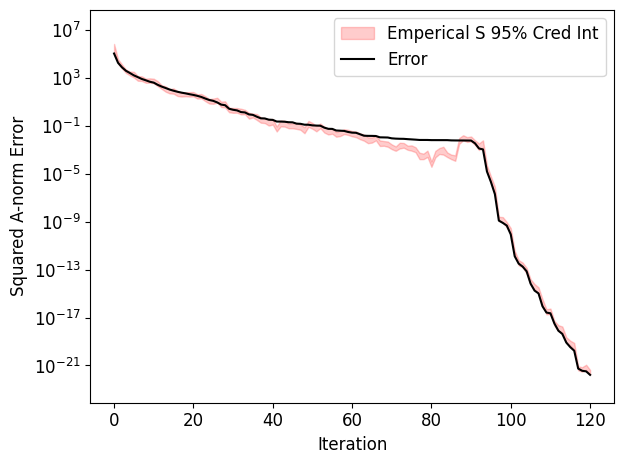

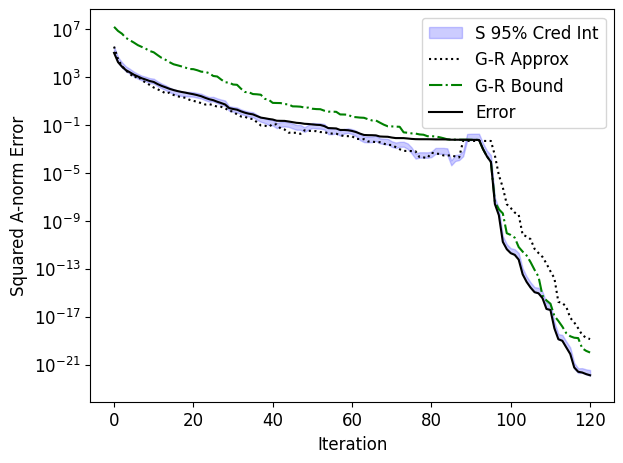

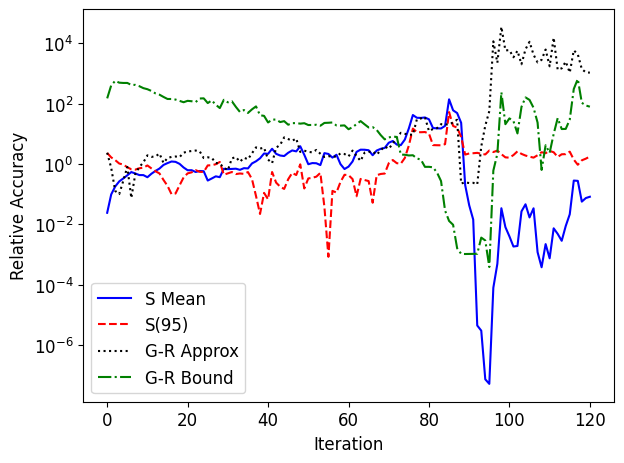

In [16]:
# RUN CELL TWICE TO SET FONT SIZE
plt.rcParams.update({'font.size': 12})

GR = .999*min(SVD_A['S'])

#Delay
d = 4

#Iterations
it = 120

#First iterations to zoom in on
it_z = None

#S statistic samples per iteration
samples = 25

#Percent in credible interval
pct = 95

#Iterations in moving average comparing error estimates
MA = 5

#Whether to reotrhogonalize
reorth = False

# Running the experiments
bayescg_exp_plots(AVec,b,x0,NormA,xTrue,GR,it,it_z,d,samples,pct,MA,reorth,plt_title=False)


plt.figure(1)
#plt.savefig('KN-Images/Supp-Images/48S.pdf')
plt.figure(2)
#plt.savefig('KN-Images/Supp-Images/48Emp.pdf')
plt.figure(3)
#plt.savefig('KN-Images/Supp-Images/48Conv.pdf')
plt.figure(4)
#plt.savefig('KN-Images/Supp-Images/48Acc.pdf')




### Second Experiment

Next, we investigate the error estimates with the $n=11948$ matrix 

#### Setup the problem


In [17]:
A = mmread('Matrices/bcsstk18_prec.mtx')

N = 11948


def AVec(w):
    return A.dot(w)


xTrue = np.ones(N)
b = AVec(xTrue)
x0 = np.zeros(N)

NormA = None


#### Run the experiment

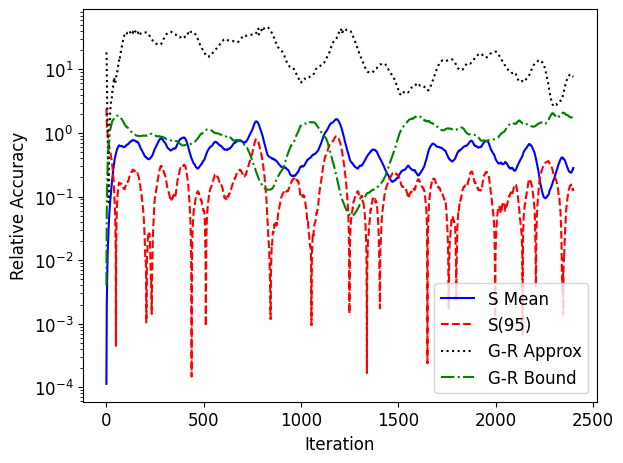

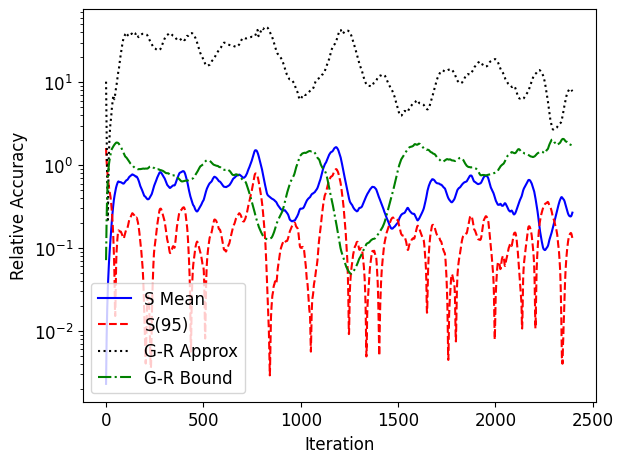

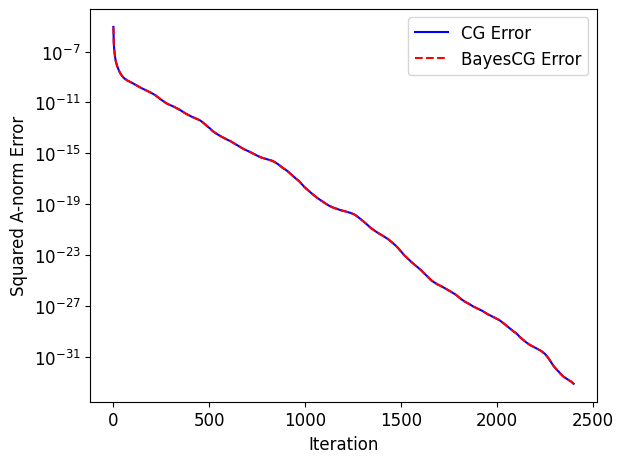

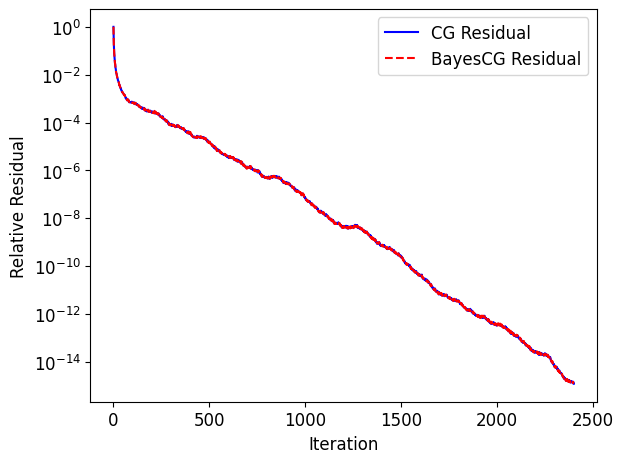

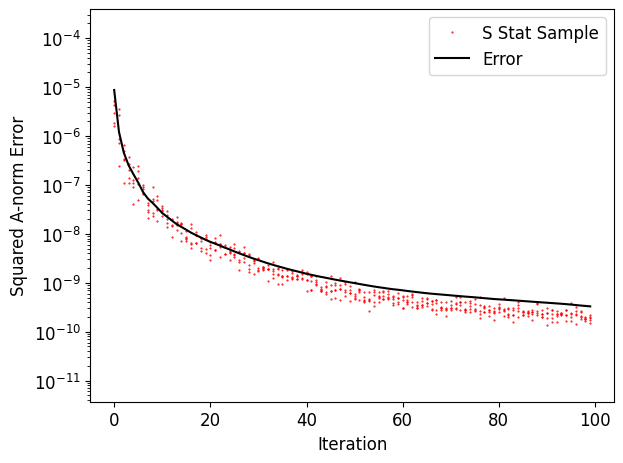

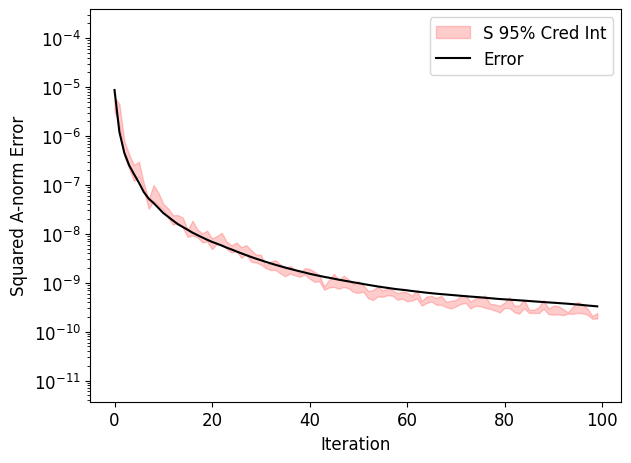

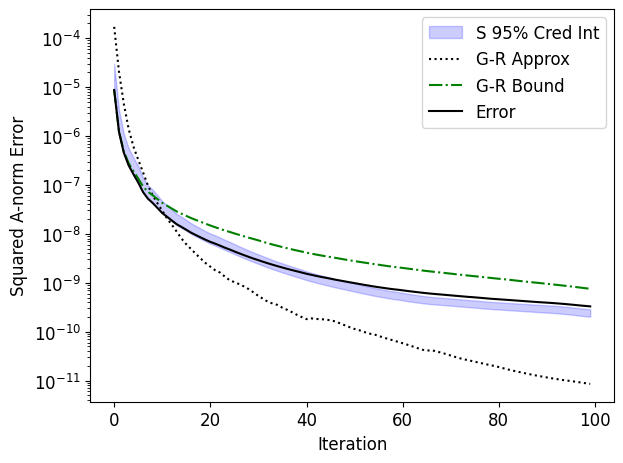

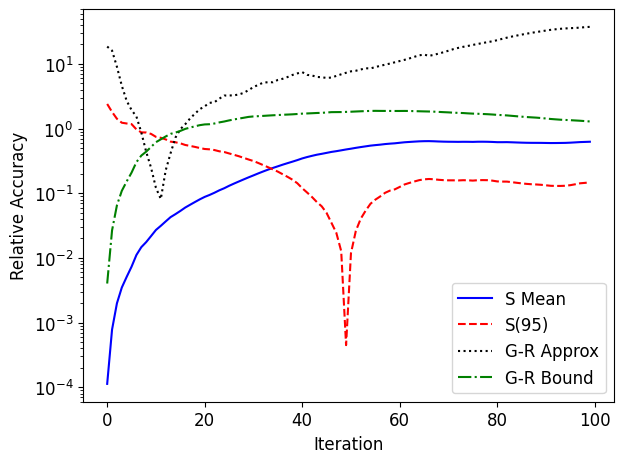

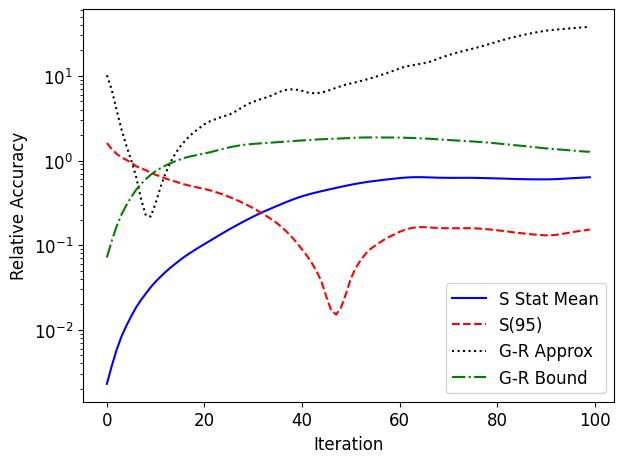

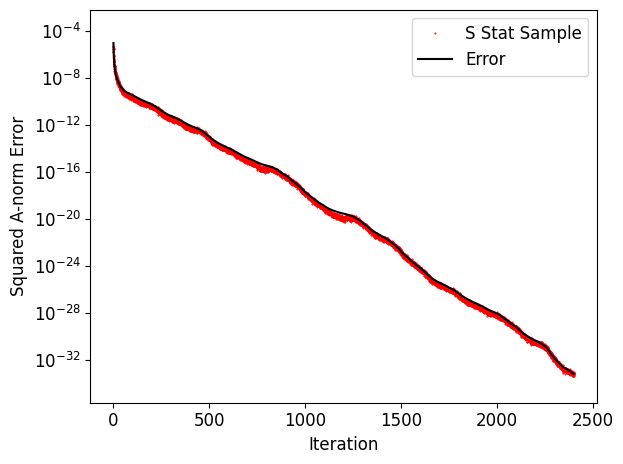

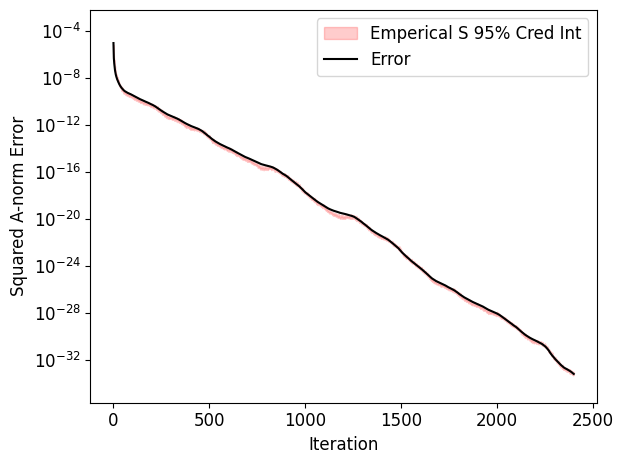

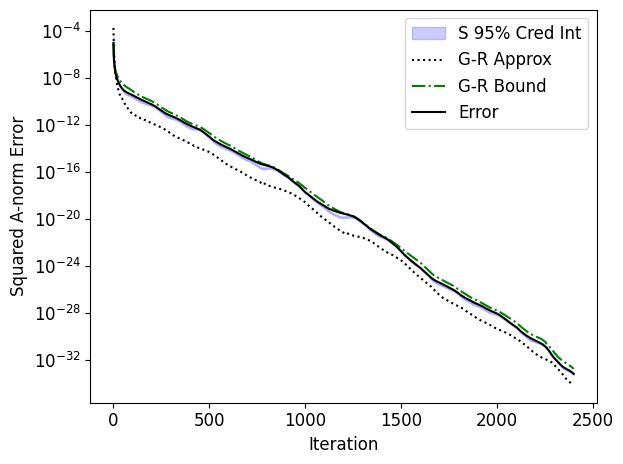

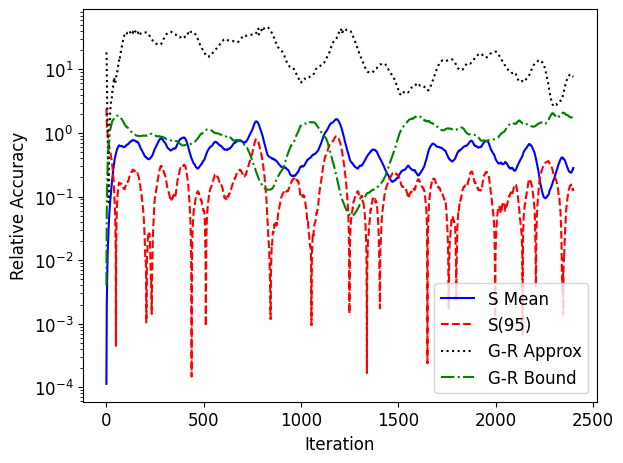

In [18]:
GR = 9e-14

#Delay
d = 50

#Iterations
it = 2400

#First iterations to zoom in on
it_z = 100

#S statistic samples per iteration
samples = 5

#Percent in credible interval
pct = 95

#Iterations in moving average comparing error estimates
MA = 5

#Whether to reotrhogonalize
reorth = False

# Running the experiments
bayescg_exp_plots(AVec,b,x0,NormA,xTrue,GR,it,it_z,d,samples,pct,MA,reorth,plt_title=False)


plt.figure(1)
#plt.savefig('KN-Images/Supp-Images/BigS.pdf')
plt.figure(2)
#plt.savefig('KN-Images/Supp-Images/BigEmp.pdf')
plt.figure(3)
#plt.savefig('KN-Images/Supp-Images/BigConv.pdf')
plt.figure(4)
#plt.savefig('KN-Images/Supp-Images/BigAcc.pdf')



## BayesCG With Different Priors

We examine the performance of BayesCG with different prior covariances on the same $n = 100$ from the main main part of the paper.

### Setup

In [22]:
np.random.seed(1)

N = 100

A,SVD_A = random_matrix_generator(N,3,2)
CondA = max(SVD_A['S'])/min(SVD_A['S'])
NormA = max(SVD_A['S'])

AInv = SVD_A['U']@np.diag(SVD_A['S']**-1)@SVD_A['U'].T

def AVec(w):
    return A@w

def AInvVec(w):
    return AInv@w

def IVec(w):
    return w

xTrue = np.ones(N)
b = AVec(xTrue)
x0 = np.zeros(N)

Err = xTrue - x0

def ErrVec(w):
    if len(w.shape) == 1:
        return np.inner(Err,w)*Err
    else:
        return np.outer(Err,Err)@w


### Run the experiment

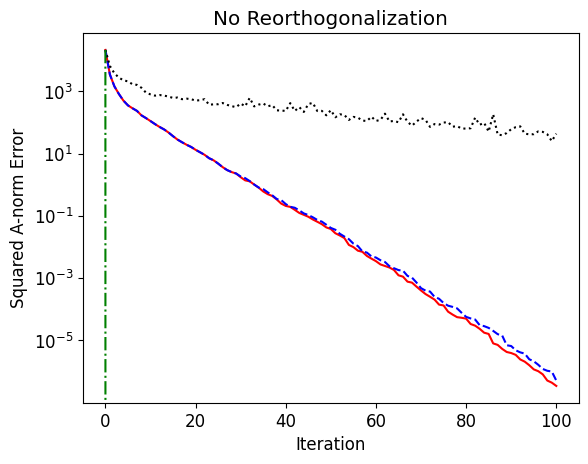

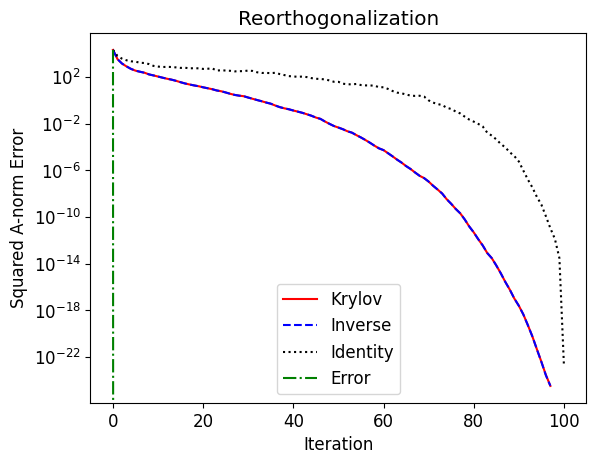

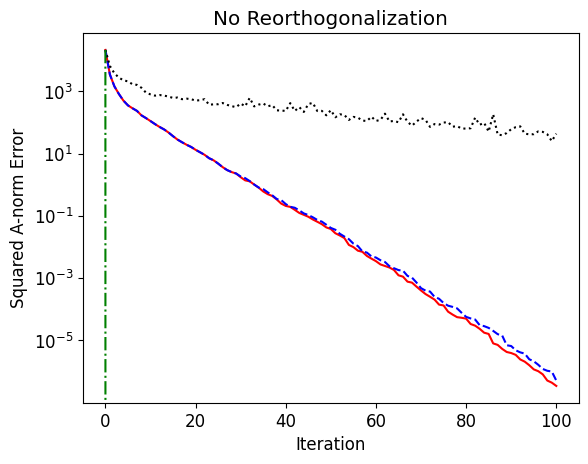

In [25]:
it = 100
reorth = True
delay = 1

_,_,_,info_k = bayescg_k(AVec,b,x0,delay,it,1e-16,1e-32,reorth=reorth,NormA=NormA,xTrue=xTrue)

_,_,info_inv = bayescg(AVec,b,x0,AInvVec,it,1e-16,reorth=reorth,NormA=NormA,xTrue=xTrue)

_,_,info_I = bayescg(AVec,b,x0,IVec,it,1e-16,reorth=reorth,NormA=NormA,xTrue=xTrue)

it = 1
_,_,info_E = bayescg(AVec,b,x0,ErrVec,it,1e-16,reorth=reorth,NormA=NormA,xTrue=xTrue)

errK = info_k['err']
errInv = info_inv['err']
errI = info_I['err']
errE = info_E['err']

green = (0,0.5,0)

plt.figure(1)
plt.semilogy(errK, label = 'Krylov', color = 'r')
plt.semilogy(errInv,'--', label = 'Inverse', color = 'b')
plt.semilogy(errI,':', label = 'Identity', color = 'k')
plt.semilogy(errE,'-.', label = 'Error', color = green)

plt.xlabel('Iteration')
plt.ylabel('Squared A-norm Error')
plt.title('Reorthogonalization')
plt.legend()

reorth = False
it = 100

_,_,_,info_k = bayescg_k(AVec,b,x0,delay,it,1e-16,1e-32,reorth = reorth,NormA = NormA,xTrue = xTrue)

_,_,info_inv = bayescg(AVec,b,x0,AInvVec,it,1e-16,reorth=reorth,NormA=NormA,xTrue=xTrue)

_,_,info_I = bayescg(AVec,b,x0,IVec,it,1e-16,reorth=reorth,NormA=NormA,xTrue=xTrue)

it = 1
_,_,info_E = bayescg(AVec,b,x0,ErrVec,it,1e-16,reorth=reorth,NormA=NormA,xTrue=xTrue)

errK = info_k['err']
errInv = info_inv['err']
errI = info_I['err']
errE = info_E['err']

plt.figure(2)
plt.semilogy(errK, label = 'Krylov', color = 'r')
plt.semilogy(errInv,'--', label = 'Inverse', color = 'b')
plt.semilogy(errI,':', label = 'Identity', color = 'k')
plt.semilogy(errE,'-.', label = 'Error', color = green)

plt.xlabel('Iteration')
plt.ylabel('Squared A-norm Error')
plt.title('No Reorthogonalization')


plt.figure(1)
#plt.savefig('KN-Images/Supp-Images/PriorErr.pdf')
plt.figure(2)
#plt.savefig('KN-Images/Supp-Images/PriorRes.pdf')



## Unpreconditioned $n=11948$ matrix

We examine CG error estimation on the unpreconditioned version of the $n=11948$ matrix.

The matrix in this experiment is the sparse matrix "BCSSTK18" from the Matrix Market.

The Gauss-Radau estimate in this experiment is the approximation of the Gauss-Radau upper bound from (Meurant and Tichy, 2019).

We have included a file, "bcsstk18.mtx' that contains the matrix. It can also be found at: (https://math.nist.gov/MatrixMarket/data/Harwell-Boeing/bcsstruc2/bcsstk18.html)

### Setup


In [26]:
A = mmread('Matrices/bcsstk18.mtx')
N = 11948

def AVec(w):
    return A.dot(w)

GR = None

NormA = linalg.norm(A.todense())
xTrue = np.ones(N)
b = AVec(xTrue)
x0 = np.zeros(N)


### Run the experiment (Takes a long time)

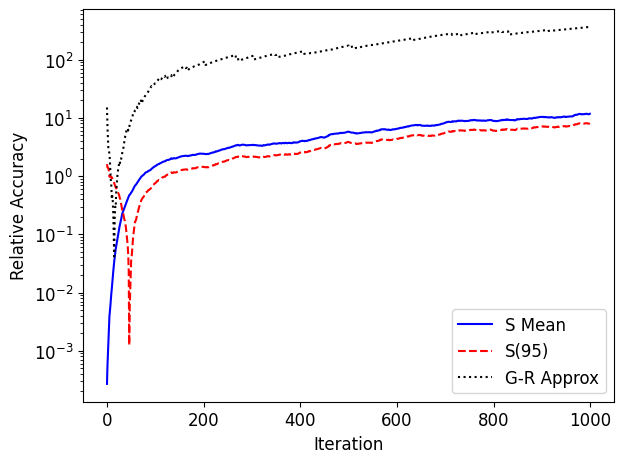

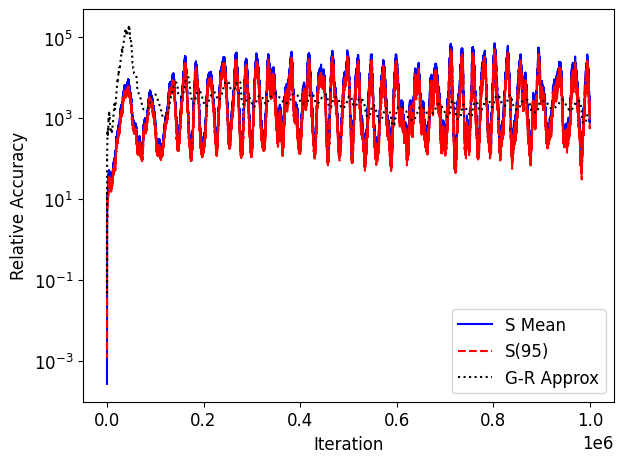

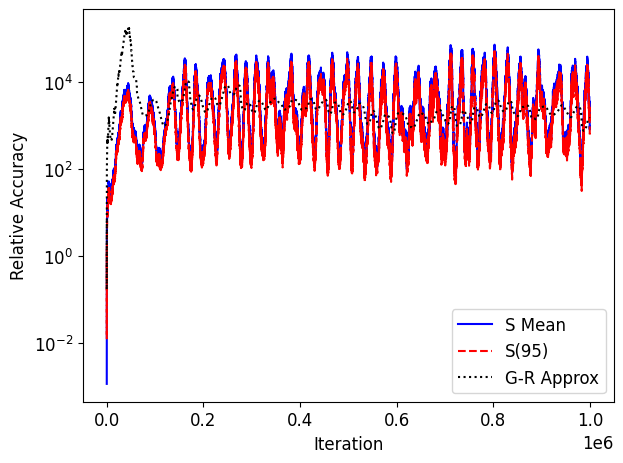

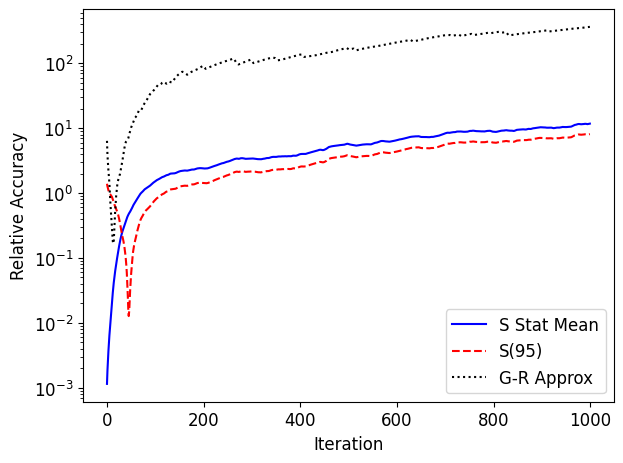

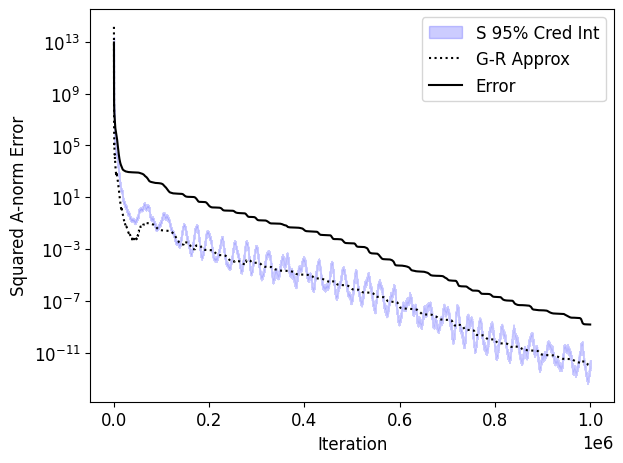

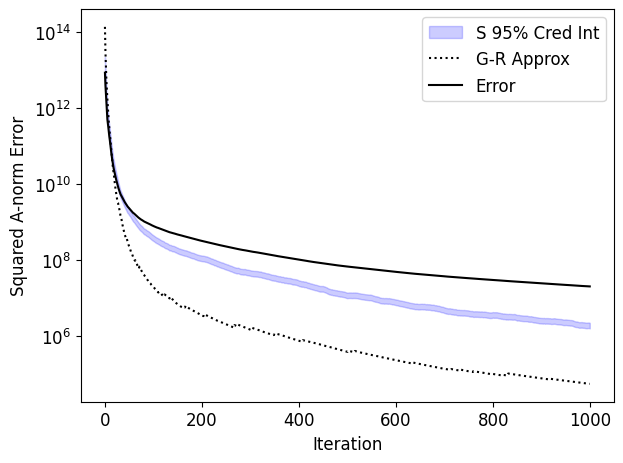

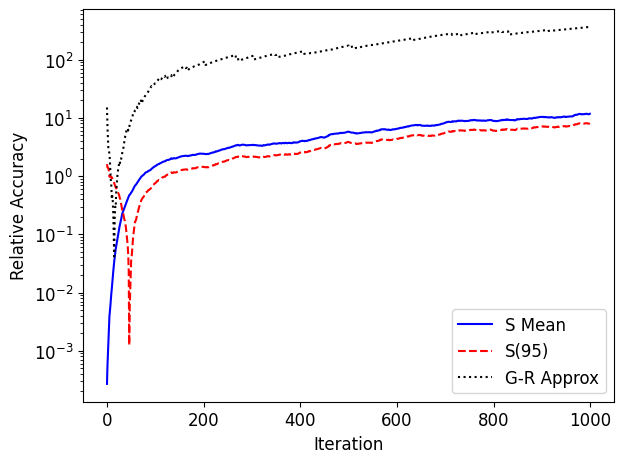

In [27]:
#Delay
d = 50

#Iterations
it = 1000000

#First iterations to zoom in on
it_z = 1000

#S statistic samples per iteration
samples = None

#Percent in credible interval
pct = 95

#Iterations in moving average comparing error estimates
MA = 5

#Whether to reotrhogonalize
reorth = False

# Running the experiments
bayescg_exp_plots(AVec,b,x0,NormA,xTrue,GR,it,it_z,d,samples,pct,MA,reorth,plt_title=False)


plt.figure(3)
#plt.savefig('KN-Images/Supp-Images/MillionCG.png',dpi=400)

plt.figure(10)
#plt.savefig('KN-Images/Supp-Images/MillionCG_z.pdf')
plt.figure(11)
#plt.savefig('KN-Images/Supp-Images/MillionErr_z.pdf')


